In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

39


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1297
number of class2:320

 ****** Running generation 0 ****** 

Population's average fitness: 0.44693 stdev: 0.21733
Best fitness: 0.83302 - size: (2, 13) - species 5 - id 12
Average adjusted fitness: 0.336
Mean genetic distance 2.964, standard deviation 0.588
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 5.795 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.58915 stdev: 0.20591
Best fitness: 0.85034 - size: (3, 15) - species 5 - id 380
Average adjusted fitness: 0.390
Mean genetic distance 3.126, standard deviation 0.518
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.257 sec (6.526 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62555 stdev: 0.20928
Best fitness: 0.85034 - size: (3, 15) - species 5 - id 380
Average adjusted fitness: 0.421
Mean genetic distance 3.130, standard deviation 0.534
Population of 207 members in 37 species
Total extinctio

Population's average fitness: 0.60312 stdev: 0.09356
Best fitness: 0.76500 - size: (3, 14) - species 5 - id 843
Average adjusted fitness: 0.272
Mean genetic distance 3.140, standard deviation 0.497
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.023 sec (6.316 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60646 stdev: 0.09458
Best fitness: 0.76500 - size: (3, 14) - species 5 - id 843
Average adjusted fitness: 0.243
Mean genetic distance 3.146, standard deviation 0.500
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.048 sec (6.499 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61273 stdev: 0.09171
Best fitness: 0.76500 - size: (3, 14) - species 5 - id 843
Average adjusted fitness: 0.237
Mean genetic distance 3.127, standard deviation 0.499
Population of 197 members in 36 species
Total extinctions: 0
Generation time: 7.032 sec (6.641 average)

 ****** Runni

Population's average fitness: 0.57792 stdev: 0.09460
Best fitness: 0.78664 - size: (3, 16) - species 22 - id 681
Average adjusted fitness: 0.242
Mean genetic distance 3.143, standard deviation 0.489
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 7.295 sec (7.114 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57880 stdev: 0.09747
Best fitness: 0.78664 - size: (3, 16) - species 2 - id 681
Average adjusted fitness: 0.330
Mean genetic distance 3.141, standard deviation 0.490
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.006 sec (7.293 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58945 stdev: 0.10677
Best fitness: 0.78912 - size: (4, 18) - species 22 - id 966
Average adjusted fitness: 0.266
Mean genetic distance 3.162, standard deviation 0.470
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.004 sec (7.245 average)

 ****** Runni

Mean genetic distance 3.184, standard deviation 0.506
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 8.029 sec (6.981 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60376 stdev: 0.08058
Best fitness: 0.75448 - size: (5, 20) - species 18 - id 1678
Average adjusted fitness: 0.271
Mean genetic distance 3.168, standard deviation 0.512
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.654 sec (7.173 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60041 stdev: 0.08840
Best fitness: 0.75448 - size: (5, 20) - species 18 - id 1678
Average adjusted fitness: 0.356
Mean genetic distance 3.173, standard deviation 0.509
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 8.145 sec (7.270 average)
number of class1:970
number of class2:647

 ****** Running generation 0 ****** 

Population's average fitness: 0.48579 stdev: 0.07812
Best fitness: 0.6722

Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.537 sec (6.442 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.63023 stdev: 0.12200
Best fitness: 0.74954 - size: (5, 18) - species 13 - id 1138
Average adjusted fitness: 0.324
Mean genetic distance 3.148, standard deviation 0.496
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 6.747 sec (6.480 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63722 stdev: 0.11793
Best fitness: 0.74954 - size: (5, 18) - species 13 - id 1138
Average adjusted fitness: 0.332
Mean genetic distance 3.120, standard deviation 0.487
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 7.050 sec (6.543 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61548 stdev: 0.12808
Best fitness: 0.74954 - size: (5, 18) - species 13 - id 1138
Average adjusted fitness: 0.308
Mean genetic distance 3.1

Population's average fitness: 0.53512 stdev: 0.07397
Best fitness: 0.77860 - size: (2, 13) - species 2 - id 14
Average adjusted fitness: 0.164
Mean genetic distance 2.974, standard deviation 0.486
Population of 197 members in 27 species
Total extinctions: 0
Generation time: 7.371 sec (6.835 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55444 stdev: 0.08695
Best fitness: 0.80210 - size: (3, 15) - species 14 - id 459
Average adjusted fitness: 0.247
Mean genetic distance 2.999, standard deviation 0.478
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 6.526 sec (6.732 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56730 stdev: 0.09335
Best fitness: 0.80210 - size: (3, 15) - species 9 - id 459
Average adjusted fitness: 0.279
Mean genetic distance 3.037, standard deviation 0.458
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.223 sec (6.855 average)

 ****** Running

Population's average fitness: 0.67210 stdev: 0.11317
Best fitness: 0.81138 - size: (6, 20) - species 23 - id 1478
Average adjusted fitness: 0.409
Mean genetic distance 3.146, standard deviation 0.477
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.333 sec (6.888 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.68654 stdev: 0.09756
Best fitness: 0.81138 - size: (6, 20) - species 23 - id 1478
Average adjusted fitness: 0.439
Mean genetic distance 3.152, standard deviation 0.480
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.149 sec (7.015 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67415 stdev: 0.11500
Best fitness: 0.81138 - size: (6, 20) - species 23 - id 1478
Average adjusted fitness: 0.373
Mean genetic distance 3.135, standard deviation 0.490
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 7.729 sec (7.183 average)

 ******

Population's average fitness: 0.58293 stdev: 0.09838
Best fitness: 0.79221 - size: (3, 15) - species 26 - id 538
Average adjusted fitness: 0.313
Mean genetic distance 3.152, standard deviation 0.446
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 6.739 sec (6.321 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59375 stdev: 0.09722
Best fitness: 0.79221 - size: (3, 15) - species 26 - id 538
Average adjusted fitness: 0.284
Mean genetic distance 3.177, standard deviation 0.438
Population of 196 members in 44 species
Total extinctions: 0
Generation time: 7.441 sec (6.508 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59162 stdev: 0.09982
Best fitness: 0.79221 - size: (3, 15) - species 26 - id 538
Average adjusted fitness: 0.301
Mean genetic distance 3.186, standard deviation 0.429
Population of 198 members in 44 species
Total extinctions: 0
Generation time: 6.552 sec (6.514 average)

 ****** Runn

Population's average fitness: 0.59412 stdev: 0.08205
Best fitness: 0.75201 - size: (4, 17) - species 31 - id 1333
Average adjusted fitness: 0.192
Mean genetic distance 3.158, standard deviation 0.471
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 6.760 sec (6.800 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.58888 stdev: 0.09320
Best fitness: 0.75943 - size: (4, 17) - species 14 - id 2110
Average adjusted fitness: 0.201
Mean genetic distance 3.150, standard deviation 0.475
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 6.999 sec (6.865 average)
number of class1:1132
number of class2:485

 ****** Running generation 0 ****** 

Population's average fitness: 0.45567 stdev: 0.14606
Best fitness: 0.73036 - size: (2, 13) - species 1 - id 157
Average adjusted fitness: 0.227
Mean genetic distance 2.935, standard deviation 0.468
Population of 201 members in 27 species
Total extinctions: 0
Generation 

Mean genetic distance 3.052, standard deviation 0.482
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 6.968 sec (6.926 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69990 stdev: 0.17603
Best fitness: 0.83117 - size: (4, 17) - species 7 - id 1350
Average adjusted fitness: 0.482
Mean genetic distance 3.050, standard deviation 0.482
Population of 207 members in 34 species
Total extinctions: 0
Generation time: 7.278 sec (6.965 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.71553 stdev: 0.15960
Best fitness: 0.83673 - size: (6, 22) - species 32 - id 1467
Average adjusted fitness: 0.490
Mean genetic distance 3.069, standard deviation 0.477
Population of 210 members in 35 species
Total extinctions: 0
Generation time: 7.668 sec (7.035 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.71143 stdev: 0.16093
Best fitness: 0.83673 - size: (6, 22) - species 32 - id 1467
Ave

Population's average fitness: 0.57683 stdev: 0.09265
Best fitness: 0.73469 - size: (4, 15) - species 20 - id 502
Average adjusted fitness: 0.221
Mean genetic distance 3.078, standard deviation 0.506
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 5.919 sec (5.704 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.59733 stdev: 0.08584
Best fitness: 0.73469 - size: (4, 15) - species 20 - id 502
Average adjusted fitness: 0.264
Mean genetic distance 3.068, standard deviation 0.518
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.320 sec (5.858 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.60006 stdev: 0.08714
Best fitness: 0.75139 - size: (2, 13) - species 22 - id 782
Average adjusted fitness: 0.255
Mean genetic distance 3.091, standard deviation 0.522
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 6.367 sec (5.960 average)

 ****** Runn

Population's average fitness: 0.61078 stdev: 0.08848
Best fitness: 0.76067 - size: (5, 23) - species 32 - id 1645
Average adjusted fitness: 0.237
Mean genetic distance 3.123, standard deviation 0.497
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 7.265 sec (6.769 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61857 stdev: 0.08163
Best fitness: 0.76067 - size: (5, 23) - species 32 - id 1645
Average adjusted fitness: 0.269
Mean genetic distance 3.149, standard deviation 0.476
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.737 sec (6.932 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62181 stdev: 0.08034
Best fitness: 0.76067 - size: (5, 23) - species 32 - id 1645
Average adjusted fitness: 0.268
Mean genetic distance 3.152, standard deviation 0.485
Population of 196 members in 35 species
Total extinctions: 0
Generation time: 7.566 sec (7.060 average)

 ******

Population's average fitness: 0.57909 stdev: 0.07722
Best fitness: 0.72356 - size: (6, 22) - species 21 - id 965
Average adjusted fitness: 0.270
Mean genetic distance 3.048, standard deviation 0.498
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.639 sec (6.726 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58682 stdev: 0.07372
Best fitness: 0.72727 - size: (6, 20) - species 28 - id 1119
Average adjusted fitness: 0.224
Mean genetic distance 3.052, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.240 sec (6.800 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.58557 stdev: 0.07973
Best fitness: 0.72727 - size: (6, 20) - species 28 - id 1119
Average adjusted fitness: 0.225
Mean genetic distance 3.071, standard deviation 0.478
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 6.804 sec (6.800 average)

 ****** Ru

Mean genetic distance 3.125, standard deviation 0.491
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 7.158 sec (6.846 average)
number of class1:969
number of class2:648

 ****** Running generation 0 ****** 

Population's average fitness: 0.47760 stdev: 0.09468
Best fitness: 0.68707 - size: (2, 13) - species 2 - id 98
Average adjusted fitness: 0.240
Mean genetic distance 2.879, standard deviation 0.470
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 5.377 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53464 stdev: 0.09740
Best fitness: 0.74212 - size: (2, 13) - species 2 - id 329
Average adjusted fitness: 0.250
Mean genetic distance 3.029, standard deviation 0.506
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 5.674 sec (5.526 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55785 stdev: 0.09581
Best fitness: 0.74212 - size: (2, 13) - spe

Population of 206 members in 33 species
Total extinctions: 0
Generation time: 6.713 sec (6.615 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.76528 stdev: 0.24069
Best fitness: 0.95671 - size: (3, 15) - species 6 - id 1222
Average adjusted fitness: 0.657
Mean genetic distance 3.220, standard deviation 0.506
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 6.762 sec (6.630 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.75814 stdev: 0.26554
Best fitness: 0.95671 - size: (3, 15) - species 6 - id 1222
Average adjusted fitness: 0.646
Mean genetic distance 3.233, standard deviation 0.507
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 6.653 sec (6.720 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.78231 stdev: 0.23545
Best fitness: 0.95671 - size: (3, 15) - species 6 - id 1222
Average adjusted fitness: 0.705
Mean genetic distance 3.24

Mean genetic distance 2.985, standard deviation 0.480
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 9.040 sec (7.504 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.57849 stdev: 0.09880
Best fitness: 0.78664 - size: (4, 17) - species 28 - id 469
Average adjusted fitness: 0.260
Mean genetic distance 3.034, standard deviation 0.470
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.484 sec (7.749 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59512 stdev: 0.10341
Best fitness: 0.78664 - size: (4, 17) - species 28 - id 469
Average adjusted fitness: 0.267
Mean genetic distance 3.069, standard deviation 0.476
Population of 206 members in 34 species
Total extinctions: 0
Generation time: 8.924 sec (7.984 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59547 stdev: 0.10690
Best fitness: 0.78664 - size: (4, 17) - species 28 - id 469
Averag

Mean genetic distance 3.164, standard deviation 0.458
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 29.291 sec (26.772 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61007 stdev: 0.09564
Best fitness: 0.75572 - size: (3, 14) - species 38 - id 1627
Average adjusted fitness: 0.221
Mean genetic distance 3.151, standard deviation 0.453
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 25.863 sec (26.915 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61548 stdev: 0.10022
Best fitness: 0.75572 - size: (3, 14) - species 38 - id 1627
Average adjusted fitness: 0.220
Mean genetic distance 3.155, standard deviation 0.445
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 26.968 sec (27.192 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61614 stdev: 0.09997
Best fitness: 0.76129 - size: (5, 20) - species 34 - id

Mean genetic distance 3.078, standard deviation 0.500
Population of 197 members in 35 species
Total extinctions: 0
Generation time: 24.557 sec (23.272 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59216 stdev: 0.07397
Best fitness: 0.67780 - size: (2, 16) - species 20 - id 797
Average adjusted fitness: 0.233
Mean genetic distance 3.118, standard deviation 0.487
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 24.560 sec (23.456 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60524 stdev: 0.06219
Best fitness: 0.68646 - size: (6, 18) - species 22 - id 1134
Average adjusted fitness: 0.221
Mean genetic distance 3.131, standard deviation 0.474
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 26.512 sec (23.838 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60247 stdev: 0.07045
Best fitness: 0.69264 - size: (8, 25) - species 33 - id 130

Mean genetic distance 3.201, standard deviation 0.471
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 22.640 sec (22.215 average)
number of class1:486
number of class2:1131

 ****** Running generation 0 ****** 

Population's average fitness: 0.54271 stdev: 0.14379
Best fitness: 0.75758 - size: (2, 13) - species 5 - id 86
Average adjusted fitness: 0.304
Mean genetic distance 2.853, standard deviation 0.448
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 17.286 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.62848 stdev: 0.12810
Best fitness: 0.77984 - size: (2, 13) - species 17 - id 315
Average adjusted fitness: 0.357
Mean genetic distance 2.965, standard deviation 0.500
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 18.243 sec (17.764 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63631 stdev: 0.12962
Best fitness: 0.77984 - size: (2, 13

Mean genetic distance 3.178, standard deviation 0.480
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 22.198 sec (20.002 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61097 stdev: 0.07138
Best fitness: 0.73036 - size: (5, 19) - species 30 - id 1341
Average adjusted fitness: 0.257
Mean genetic distance 3.186, standard deviation 0.473
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 22.382 sec (20.240 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61251 stdev: 0.07690
Best fitness: 0.73036 - size: (5, 19) - species 30 - id 1341
Average adjusted fitness: 0.265
Mean genetic distance 3.165, standard deviation 0.467
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 23.089 sec (20.830 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61952 stdev: 0.07061
Best fitness: 0.73036 - size: (5, 19) - species 30 - id 

Mean genetic distance 2.929, standard deviation 0.503
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 18.933 sec (18.185 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.75785 stdev: 0.22213
Best fitness: 0.92208 - size: (4, 15) - species 15 - id 419
Average adjusted fitness: 0.641
Mean genetic distance 2.957, standard deviation 0.505
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 19.385 sec (18.485 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.76527 stdev: 0.21638
Best fitness: 0.92208 - size: (4, 15) - species 15 - id 419
Average adjusted fitness: 0.652
Mean genetic distance 2.955, standard deviation 0.525
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 20.030 sec (18.794 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.78208 stdev: 0.19374
Best fitness: 0.92208 - size: (4, 15) - species 15 - id 419


Mean genetic distance 3.142, standard deviation 0.456
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 22.026 sec (20.822 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.60951 stdev: 0.09484
Best fitness: 0.75819 - size: (3, 17) - species 18 - id 1888
Average adjusted fitness: 0.212
Mean genetic distance 3.163, standard deviation 0.444
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 21.786 sec (21.092 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61401 stdev: 0.09664
Best fitness: 0.75819 - size: (3, 17) - species 18 - id 1888
Average adjusted fitness: 0.333
Mean genetic distance 3.173, standard deviation 0.443
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 23.377 sec (21.422 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61634 stdev: 0.10058
Best fitness: 0.75819 - size: (3, 17) - species 18 - id

Mean genetic distance 3.097, standard deviation 0.482
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 21.493 sec (19.490 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.61351 stdev: 0.07624
Best fitness: 0.75139 - size: (7, 23) - species 25 - id 1141
Average adjusted fitness: 0.297
Mean genetic distance 3.097, standard deviation 0.493
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 21.105 sec (19.721 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60144 stdev: 0.08979
Best fitness: 0.75139 - size: (7, 23) - species 25 - id 1141
Average adjusted fitness: 0.293
Mean genetic distance 3.160, standard deviation 0.489
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 22.853 sec (20.113 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.60635 stdev: 0.08397
Best fitness: 0.75139 - size: (7, 23) - species 25 - id 11

Mean genetic distance 3.146, standard deviation 0.474
Population of 199 members in 41 species
Total extinctions: 0
Generation time: 22.429 sec (21.689 average)
number of class1:1131
number of class2:486

 ****** Running generation 0 ****** 

Population's average fitness: 0.44847 stdev: 0.15321
Best fitness: 0.75015 - size: (2, 13) - species 3 - id 91
Average adjusted fitness: 0.224
Mean genetic distance 2.907, standard deviation 0.450
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 17.247 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56145 stdev: 0.15125
Best fitness: 0.76933 - size: (3, 15) - species 5 - id 265
Average adjusted fitness: 0.292
Mean genetic distance 2.982, standard deviation 0.447
Population of 203 members in 28 species
Total extinctions: 0
Generation time: 18.198 sec (17.723 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57258 stdev: 0.15874
Best fitness: 0.77427 - size: (3, 16)

Mean genetic distance 3.085, standard deviation 0.502
Population of 204 members in 41 species
Total extinctions: 0
Generation time: 21.479 sec (20.258 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61655 stdev: 0.08565
Best fitness: 0.77118 - size: (5, 19) - species 19 - id 1181
Average adjusted fitness: 0.269
Mean genetic distance 3.070, standard deviation 0.501
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 22.394 sec (20.471 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62752 stdev: 0.08365
Best fitness: 0.77118 - size: (5, 19) - species 19 - id 1181
Average adjusted fitness: 0.271
Mean genetic distance 3.072, standard deviation 0.499
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 22.273 sec (21.004 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62197 stdev: 0.09081
Best fitness: 0.77860 - size: (6, 20) - species 19 - id 

Mean genetic distance 2.958, standard deviation 0.500
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 18.740 sec (18.049 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.55950 stdev: 0.07764
Best fitness: 0.78293 - size: (3, 14) - species 21 - id 360
Average adjusted fitness: 0.190
Mean genetic distance 3.055, standard deviation 0.529
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 19.509 sec (18.414 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57169 stdev: 0.07963
Best fitness: 0.78293 - size: (3, 14) - species 21 - id 360
Average adjusted fitness: 0.210
Mean genetic distance 3.061, standard deviation 0.525
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 19.940 sec (18.719 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58452 stdev: 0.08624
Best fitness: 0.78293 - size: (3, 14) - species 21 - id 360


Mean genetic distance 3.133, standard deviation 0.488
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 22.000 sec (20.853 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67725 stdev: 0.12524
Best fitness: 0.83179 - size: (3, 12) - species 25 - id 1854
Average adjusted fitness: 0.383
Mean genetic distance 3.143, standard deviation 0.482
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 22.310 sec (21.172 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67905 stdev: 0.12390
Best fitness: 0.83179 - size: (3, 12) - species 25 - id 1854
Average adjusted fitness: 0.390
Mean genetic distance 3.157, standard deviation 0.492
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 22.599 sec (21.454 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66325 stdev: 0.13857
Best fitness: 0.83179 - size: (3, 12) - species 25 - id

Mean genetic distance 3.190, standard deviation 0.516
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 20.438 sec (19.262 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.58955 stdev: 0.08154
Best fitness: 0.75819 - size: (3, 16) - species 3 - id 539
Average adjusted fitness: 0.276
Mean genetic distance 3.214, standard deviation 0.508
Population of 194 members in 37 species
Total extinctions: 0
Generation time: 21.029 sec (19.514 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60131 stdev: 0.07943
Best fitness: 0.75819 - size: (3, 16) - species 3 - id 539
Average adjusted fitness: 0.252
Mean genetic distance 3.286, standard deviation 0.499
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 20.801 sec (19.675 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.59669 stdev: 0.08125
Best fitness: 0.75819 - size: (3, 16) - species 3 - id 539
Ave

Mean genetic distance 3.190, standard deviation 0.480
Population of 198 members in 42 species
Total extinctions: 0
Generation time: 22.427 sec (21.964 average)
number of class1:806
number of class2:811

 ****** Running generation 0 ****** 

Population's average fitness: 0.50053 stdev: 0.07979
Best fitness: 0.71861 - size: (2, 13) - species 3 - id 42
Average adjusted fitness: 0.238
Mean genetic distance 2.995, standard deviation 0.514
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.230 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54942 stdev: 0.08445
Best fitness: 0.72480 - size: (3, 15) - species 2 - id 242
Average adjusted fitness: 0.243
Mean genetic distance 3.071, standard deviation 0.517
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 18.927 sec (18.079 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56833 stdev: 0.08526
Best fitness: 0.73779 - size: (2, 13) 

Mean genetic distance 3.139, standard deviation 0.525
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.193 sec (20.088 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.57481 stdev: 0.06948
Best fitness: 0.70192 - size: (5, 22) - species 7 - id 1415
Average adjusted fitness: 0.151
Mean genetic distance 3.160, standard deviation 0.525
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 21.683 sec (20.247 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58074 stdev: 0.07057
Best fitness: 0.71676 - size: (6, 18) - species 23 - id 1639
Average adjusted fitness: 0.172
Mean genetic distance 3.187, standard deviation 0.514
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 21.915 sec (20.704 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.58050 stdev: 0.07201
Best fitness: 0.71676 - size: (6, 18) - species 23 - id 1

Mean genetic distance 3.036, standard deviation 0.463
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 18.937 sec (18.182 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.62084 stdev: 0.13142
Best fitness: 0.79839 - size: (3, 14) - species 19 - id 499
Average adjusted fitness: 0.359
Mean genetic distance 3.106, standard deviation 0.465
Population of 205 members in 46 species
Total extinctions: 0
Generation time: 20.576 sec (18.781 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61644 stdev: 0.13397
Best fitness: 0.79839 - size: (3, 14) - species 19 - id 499
Average adjusted fitness: 0.350
Mean genetic distance 3.160, standard deviation 0.475
Population of 201 members in 48 species
Total extinctions: 0
Generation time: 21.150 sec (19.255 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63661 stdev: 0.12204
Best fitness: 0.80087 - size: (5, 19) - species 19 - id 879


Mean genetic distance 3.149, standard deviation 0.467
Population of 204 members in 45 species
Total extinctions: 0
Generation time: 22.900 sec (21.477 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67787 stdev: 0.11055
Best fitness: 0.82375 - size: (4, 16) - species 36 - id 1627
Average adjusted fitness: 0.415
Mean genetic distance 3.173, standard deviation 0.470
Population of 203 members in 47 species
Total extinctions: 0
Generation time: 22.880 sec (21.797 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.66830 stdev: 0.12130
Best fitness: 0.82375 - size: (4, 16) - species 36 - id 1627
Average adjusted fitness: 0.392
Mean genetic distance 3.185, standard deviation 0.474
Population of 198 members in 48 species
Total extinctions: 0
Generation time: 23.179 sec (22.069 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66117 stdev: 0.12289
Best fitness: 0.82375 - size: (4, 16) - species 36 - id

Mean genetic distance 3.091, standard deviation 0.540
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 20.226 sec (19.086 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57382 stdev: 0.08545
Best fitness: 0.72542 - size: (4, 18) - species 31 - id 878
Average adjusted fitness: 0.216
Mean genetic distance 3.102, standard deviation 0.534
Population of 208 members in 34 species
Total extinctions: 0
Generation time: 21.023 sec (19.363 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57683 stdev: 0.08660
Best fitness: 0.73840 - size: (6, 20) - species 12 - id 1150
Average adjusted fitness: 0.216
Mean genetic distance 3.065, standard deviation 0.535
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 21.094 sec (19.579 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58493 stdev: 0.07976
Best fitness: 0.73840 - size: (6, 20) - species 12 - id 115

Mean genetic distance 3.281, standard deviation 0.482
Population of 193 members in 36 species
Total extinctions: 0
Generation time: 23.574 sec (21.741 average)
number of class1:639
number of class2:978

 ****** Running generation 0 ****** 

Population's average fitness: 0.51380 stdev: 0.08613
Best fitness: 0.66605 - size: (2, 13) - species 1 - id 175
Average adjusted fitness: 0.223
Mean genetic distance 2.911, standard deviation 0.473
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.132 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56013 stdev: 0.07967
Best fitness: 0.70130 - size: (3, 15) - species 11 - id 230
Average adjusted fitness: 0.223
Mean genetic distance 3.026, standard deviation 0.485
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 18.172 sec (17.652 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57794 stdev: 0.07416
Best fitness: 0.71119 - size: (3, 15

Mean genetic distance 3.152, standard deviation 0.483
Population of 200 members in 42 species
Total extinctions: 0
Generation time: 21.586 sec (20.362 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59893 stdev: 0.08042
Best fitness: 0.75263 - size: (4, 17) - species 39 - id 1277
Average adjusted fitness: 0.236
Mean genetic distance 3.158, standard deviation 0.473
Population of 189 members in 43 species
Total extinctions: 0
Generation time: 21.866 sec (20.512 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59632 stdev: 0.08226
Best fitness: 0.75263 - size: (4, 17) - species 39 - id 1277
Average adjusted fitness: 0.237
Mean genetic distance 3.182, standard deviation 0.453
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 21.334 sec (20.948 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60063 stdev: 0.07886
Best fitness: 0.75263 - size: (4, 17) - species 39 - id 

Mean genetic distance 3.023, standard deviation 0.483
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 19.358 sec (18.328 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.56427 stdev: 0.08590
Best fitness: 0.72789 - size: (4, 16) - species 10 - id 466
Average adjusted fitness: 0.185
Mean genetic distance 3.053, standard deviation 0.491
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 19.874 sec (18.715 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56840 stdev: 0.08477
Best fitness: 0.72789 - size: (4, 16) - species 6 - id 466
Average adjusted fitness: 0.207
Mean genetic distance 3.042, standard deviation 0.480
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 20.868 sec (19.145 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.56928 stdev: 0.08642
Best fitness: 0.72789 - size: (4, 16) - species 10 - id 466
A

Mean genetic distance 2.962, standard deviation 0.541
Population of 206 members in 27 species
Total extinctions: 0
Generation time: 22.673 sec (20.934 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.79653 stdev: 0.20396
Best fitness: 0.94125 - size: (6, 22) - species 9 - id 1327
Average adjusted fitness: 0.674
Mean genetic distance 2.988, standard deviation 0.539
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 21.878 sec (21.117 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75462 stdev: 0.24346
Best fitness: 0.94125 - size: (6, 22) - species 9 - id 1327
Average adjusted fitness: 0.634
Mean genetic distance 2.994, standard deviation 0.532
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 21.739 sec (21.248 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76349 stdev: 0.23622
Best fitness: 0.94125 - size: (6, 22) - species 9 - id 13

Mean genetic distance 3.209, standard deviation 0.482
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 21.424 sec (19.622 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.59678 stdev: 0.10869
Best fitness: 0.78602 - size: (5, 18) - species 21 - id 1041
Average adjusted fitness: 0.253
Mean genetic distance 3.221, standard deviation 0.463
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 21.364 sec (19.871 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.60609 stdev: 0.10806
Best fitness: 0.78602 - size: (5, 18) - species 21 - id 1041
Average adjusted fitness: 0.268
Mean genetic distance 3.189, standard deviation 0.467
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 21.486 sec (20.072 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61090 stdev: 0.11231
Best fitness: 0.78602 - size: (5, 18) - species 21 - id 10

Mean genetic distance 3.186, standard deviation 0.481
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 20.877 sec (21.022 average)
number of class1:974
number of class2:643

 ****** Running generation 0 ****** 

Population's average fitness: 0.47968 stdev: 0.08785
Best fitness: 0.71429 - size: (2, 13) - species 5 - id 182
Average adjusted fitness: 0.171
Mean genetic distance 2.861, standard deviation 0.485
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 17.125 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54670 stdev: 0.08318
Best fitness: 0.71429 - size: (2, 13) - species 2 - id 182
Average adjusted fitness: 0.230
Mean genetic distance 2.950, standard deviation 0.494
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.223 sec (17.674 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56110 stdev: 0.08707
Best fitness: 0.72480 - size: (4, 16)

Mean genetic distance 3.029, standard deviation 0.490
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 21.427 sec (20.048 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61591 stdev: 0.08706
Best fitness: 0.76747 - size: (5, 17) - species 13 - id 1162
Average adjusted fitness: 0.253
Mean genetic distance 3.033, standard deviation 0.488
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 21.761 sec (20.219 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62029 stdev: 0.08623
Best fitness: 0.76747 - size: (5, 17) - species 13 - id 1162
Average adjusted fitness: 0.293
Mean genetic distance 3.064, standard deviation 0.482
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 21.779 sec (20.684 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60743 stdev: 0.09617
Best fitness: 0.76747 - size: (5, 17) - species 13 - id 

Mean genetic distance 3.004, standard deviation 0.482
Population of 202 members in 27 species
Total extinctions: 0
Generation time: 18.722 sec (18.082 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.60714 stdev: 0.12881
Best fitness: 0.77180 - size: (4, 17) - species 11 - id 686
Average adjusted fitness: 0.323
Mean genetic distance 2.992, standard deviation 0.469
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 19.729 sec (18.494 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.63537 stdev: 0.12199
Best fitness: 0.77180 - size: (4, 17) - species 28 - id 686
Average adjusted fitness: 0.333
Mean genetic distance 3.050, standard deviation 0.472
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 20.509 sec (18.897 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64086 stdev: 0.11014
Best fitness: 0.77180 - size: (4, 17) - species 28 - id 686


Mean genetic distance 3.175, standard deviation 0.492
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.802 sec (21.429 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.66547 stdev: 0.12608
Best fitness: 0.80148 - size: (5, 20) - species 5 - id 1454
Average adjusted fitness: 0.369
Mean genetic distance 3.160, standard deviation 0.494
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 22.704 sec (21.788 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67645 stdev: 0.11232
Best fitness: 0.80148 - size: (5, 20) - species 5 - id 1454
Average adjusted fitness: 0.407
Mean genetic distance 3.189, standard deviation 0.497
Population of 198 members in 35 species
Total extinctions: 0
Generation time: 22.398 sec (22.015 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68662 stdev: 0.10939
Best fitness: 0.81076 - size: (5, 22) - species 26 - id 2

Mean genetic distance 3.088, standard deviation 0.482
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 20.659 sec (19.460 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.56454 stdev: 0.06580
Best fitness: 0.71429 - size: (3, 14) - species 11 - id 216
Average adjusted fitness: 0.173
Mean genetic distance 3.088, standard deviation 0.498
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 20.657 sec (19.631 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57166 stdev: 0.07034
Best fitness: 0.71429 - size: (3, 14) - species 11 - id 216
Average adjusted fitness: 0.237
Mean genetic distance 3.075, standard deviation 0.479
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.345 sec (19.845 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57129 stdev: 0.06971
Best fitness: 0.73593 - size: (3, 17) - species 11 - id 1369

Mean genetic distance 3.213, standard deviation 0.489
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 23.489 sec (22.146 average)
number of class1:813
number of class2:804

 ****** Running generation 0 ****** 

Population's average fitness: 0.49989 stdev: 0.05604
Best fitness: 0.65986 - size: (2, 13) - species 3 - id 33
Average adjusted fitness: 0.196
Mean genetic distance 2.821, standard deviation 0.456
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 17.287 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52515 stdev: 0.06294
Best fitness: 0.66357 - size: (3, 15) - species 5 - id 258
Average adjusted fitness: 0.200
Mean genetic distance 2.939, standard deviation 0.492
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 18.163 sec (17.725 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54622 stdev: 0.05912
Best fitness: 0.72418 - size: (3, 16) 

Mean genetic distance 3.134, standard deviation 0.493
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 20.757 sec (19.853 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.59322 stdev: 0.07639
Best fitness: 0.78541 - size: (3, 13) - species 7 - id 1365
Average adjusted fitness: 0.191
Mean genetic distance 3.107, standard deviation 0.501
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 21.682 sec (20.036 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.59732 stdev: 0.08369
Best fitness: 0.78541 - size: (3, 13) - species 7 - id 1365
Average adjusted fitness: 0.277
Mean genetic distance 3.117, standard deviation 0.489
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 22.079 sec (20.490 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59192 stdev: 0.07643
Best fitness: 0.78541 - size: (3, 13) - species 7 - id 136

Mean genetic distance 3.026, standard deviation 0.470
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 20.077 sec (18.605 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.64518 stdev: 0.20970
Best fitness: 0.86827 - size: (3, 14) - species 22 - id 674
Average adjusted fitness: 0.449
Mean genetic distance 3.066, standard deviation 0.470
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 20.385 sec (19.050 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64240 stdev: 0.20032
Best fitness: 0.86827 - size: (3, 14) - species 22 - id 674
Average adjusted fitness: 0.414
Mean genetic distance 3.077, standard deviation 0.472
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 20.648 sec (19.369 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69080 stdev: 0.18539
Best fitness: 0.86827 - size: (3, 14) - species 22 - id 674


Mean genetic distance 3.181, standard deviation 0.502
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 21.583 sec (20.608 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.76620 stdev: 0.11211
Best fitness: 0.88126 - size: (3, 14) - species 26 - id 1691
Average adjusted fitness: 0.515
Mean genetic distance 3.199, standard deviation 0.499
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 21.557 sec (20.837 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.75660 stdev: 0.13538
Best fitness: 0.88126 - size: (3, 14) - species 26 - id 1691
Average adjusted fitness: 0.552
Mean genetic distance 3.220, standard deviation 0.494
Population of 198 members in 38 species
Total extinctions: 0
Generation time: 22.121 sec (21.150 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.74331 stdev: 0.15399
Best fitness: 0.88126 - size: (3, 14) - species 26 - id

Mean genetic distance 3.106, standard deviation 0.483
Population of 191 members in 36 species
Total extinctions: 0
Generation time: 20.418 sec (19.439 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57782 stdev: 0.07159
Best fitness: 0.72294 - size: (3, 15) - species 22 - id 845
Average adjusted fitness: 0.239
Mean genetic distance 3.132, standard deviation 0.480
Population of 201 members in 37 species
Total extinctions: 0
Generation time: 19.986 sec (19.518 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57818 stdev: 0.07690
Best fitness: 0.72294 - size: (3, 15) - species 22 - id 845
Average adjusted fitness: 0.288
Mean genetic distance 3.147, standard deviation 0.476
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 21.820 sec (19.805 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58298 stdev: 0.07288
Best fitness: 0.73284 - size: (5, 21) - species 5 - id 1359


Mean genetic distance 3.078, standard deviation 0.485
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 23.725 sec (21.920 average)
number of class1:1135
number of class2:482

 ****** Running generation 0 ****** 

Population's average fitness: 0.45346 stdev: 0.13743
Best fitness: 0.70192 - size: (2, 13) - species 5 - id 70
Average adjusted fitness: 0.180
Mean genetic distance 2.823, standard deviation 0.457
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.224 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56079 stdev: 0.13486
Best fitness: 0.73531 - size: (2, 14) - species 4 - id 251
Average adjusted fitness: 0.325
Mean genetic distance 2.935, standard deviation 0.485
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 18.166 sec (17.695 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60450 stdev: 0.12754
Best fitness: 0.73717 - size: (2, 14)

Mean genetic distance 3.147, standard deviation 0.476
Population of 192 members in 33 species
Total extinctions: 0
Generation time: 21.744 sec (20.269 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61090 stdev: 0.08737
Best fitness: 0.81385 - size: (4, 19) - species 25 - id 1479
Average adjusted fitness: 0.205
Mean genetic distance 3.160, standard deviation 0.458
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 21.778 sec (20.420 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61855 stdev: 0.09035
Best fitness: 0.81385 - size: (4, 19) - species 25 - id 1479
Average adjusted fitness: 0.258
Mean genetic distance 3.180, standard deviation 0.453
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 22.731 sec (20.968 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61578 stdev: 0.08861
Best fitness: 0.81385 - size: (4, 19) - species 25 - id 

Mean genetic distance 3.082, standard deviation 0.533
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 19.355 sec (18.446 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58521 stdev: 0.09709
Best fitness: 0.81076 - size: (3, 15) - species 20 - id 432
Average adjusted fitness: 0.312
Mean genetic distance 3.070, standard deviation 0.497
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 19.692 sec (18.757 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59013 stdev: 0.10647
Best fitness: 0.81076 - size: (3, 15) - species 20 - id 432
Average adjusted fitness: 0.239
Mean genetic distance 3.089, standard deviation 0.489
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 20.027 sec (19.011 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59929 stdev: 0.10556
Best fitness: 0.82993 - size: (4, 17) - species 20 - id 963


Mean genetic distance 3.239, standard deviation 0.521
Population of 197 members in 43 species
Total extinctions: 0
Generation time: 21.619 sec (20.892 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69139 stdev: 0.10274
Best fitness: 0.82808 - size: (5, 20) - species 17 - id 1514
Average adjusted fitness: 0.397
Mean genetic distance 3.228, standard deviation 0.514
Population of 194 members in 43 species
Total extinctions: 0
Generation time: 22.123 sec (21.155 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.69071 stdev: 0.10498
Best fitness: 0.82808 - size: (5, 20) - species 17 - id 1514
Average adjusted fitness: 0.392
Mean genetic distance 3.203, standard deviation 0.506
Population of 195 members in 43 species
Total extinctions: 0
Generation time: 21.680 sec (21.335 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68707 stdev: 0.11898
Best fitness: 0.82808 - size: (5, 20) - species 17 - id

Mean genetic distance 3.061, standard deviation 0.455
Population of 196 members in 45 species
Total extinctions: 0
Generation time: 20.723 sec (19.563 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.69170 stdev: 0.17193
Best fitness: 0.84910 - size: (4, 16) - species 2 - id 916
Average adjusted fitness: 0.480
Mean genetic distance 3.084, standard deviation 0.455
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 20.446 sec (19.690 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.71145 stdev: 0.15205
Best fitness: 0.84910 - size: (4, 16) - species 47 - id 916
Average adjusted fitness: 0.500
Mean genetic distance 3.093, standard deviation 0.453
Population of 193 members in 47 species
Total extinctions: 0
Generation time: 22.575 sec (20.050 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.70831 stdev: 0.16026
Best fitness: 0.85405 - size: (6, 19) - species 18 - id 1218


Mean genetic distance 3.155, standard deviation 0.479
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 22.238 sec (21.731 average)
number of class1:651
number of class2:966

 ****** Running generation 0 ****** 

Population's average fitness: 0.51387 stdev: 0.10021
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.266
Mean genetic distance 2.831, standard deviation 0.458
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 17.451 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56330 stdev: 0.08690
Best fitness: 0.75634 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.227
Mean genetic distance 2.961, standard deviation 0.493
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 18.793 sec (18.122 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57208 stdev: 0.09935
Best fitness: 0.77860 - size: (2, 13)

Mean genetic distance 3.120, standard deviation 0.534
Population of 197 members in 33 species
Total extinctions: 0
Generation time: 21.321 sec (20.084 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.64390 stdev: 0.14728
Best fitness: 0.80952 - size: (4, 18) - species 17 - id 1513
Average adjusted fitness: 0.359
Mean genetic distance 3.140, standard deviation 0.516
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 21.063 sec (20.182 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.65240 stdev: 0.14084
Best fitness: 0.81509 - size: (4, 18) - species 2 - id 1603
Average adjusted fitness: 0.398
Mean genetic distance 3.106, standard deviation 0.526
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 22.564 sec (20.720 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.66072 stdev: 0.12467
Best fitness: 0.81509 - size: (4, 18) - species 2 - id 16

Mean genetic distance 3.037, standard deviation 0.489
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 18.996 sec (18.276 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.68409 stdev: 0.17942
Best fitness: 0.85900 - size: (2, 14) - species 13 - id 683
Average adjusted fitness: 0.448
Mean genetic distance 3.110, standard deviation 0.494
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 20.623 sec (18.863 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.70219 stdev: 0.16871
Best fitness: 0.85900 - size: (2, 14) - species 13 - id 683
Average adjusted fitness: 0.471
Mean genetic distance 3.139, standard deviation 0.494
Population of 207 members in 33 species
Total extinctions: 0
Generation time: 21.710 sec (19.432 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.69714 stdev: 0.17010
Best fitness: 0.85900 - size: (2, 14) - species 13 - id 683


Mean genetic distance 3.122, standard deviation 0.480
Population of 197 members in 40 species
Total extinctions: 0
Generation time: 23.178 sec (21.643 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.69904 stdev: 0.18779
Best fitness: 0.86024 - size: (5, 20) - species 25 - id 1054
Average adjusted fitness: 0.515
Mean genetic distance 3.129, standard deviation 0.476
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 22.394 sec (21.914 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.72194 stdev: 0.16980
Best fitness: 0.86024 - size: (5, 20) - species 25 - id 1054
Average adjusted fitness: 0.537
Mean genetic distance 3.118, standard deviation 0.473
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 22.991 sec (22.173 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.72055 stdev: 0.17407
Best fitness: 0.86024 - size: (5, 20) - species 25 - id

Mean genetic distance 2.986, standard deviation 0.510
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 21.032 sec (19.433 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.62120 stdev: 0.09455
Best fitness: 0.79344 - size: (2, 13) - species 3 - id 9
Average adjusted fitness: 0.269
Mean genetic distance 3.019, standard deviation 0.501
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 21.361 sec (19.709 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61200 stdev: 0.10133
Best fitness: 0.79344 - size: (2, 13) - species 3 - id 9
Average adjusted fitness: 0.256
Mean genetic distance 3.045, standard deviation 0.518
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.997 sec (19.995 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61509 stdev: 0.10451
Best fitness: 0.79344 - size: (2, 13) - species 3 - id 9
Average a

Mean genetic distance 3.085, standard deviation 0.493
Population of 196 members in 36 species
Total extinctions: 0
Generation time: 24.074 sec (22.268 average)
number of class1:804
number of class2:813

 ****** Running generation 0 ****** 

Population's average fitness: 0.49099 stdev: 0.06032
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 109
Average adjusted fitness: 0.202
Mean genetic distance 2.994, standard deviation 0.557
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 17.396 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52286 stdev: 0.06113
Best fitness: 0.72727 - size: (2, 13) - species 1 - id 109
Average adjusted fitness: 0.187
Mean genetic distance 3.055, standard deviation 0.546
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 18.338 sec (17.867 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53900 stdev: 0.06956
Best fitness: 0.75325 - size: (4, 16)

Mean genetic distance 3.256, standard deviation 0.496
Population of 197 members in 42 species
Total extinctions: 0
Generation time: 21.650 sec (19.991 average)

 ****** Running generation 9 ****** 

Population's average fitness: 0.61671 stdev: 0.09199
Best fitness: 0.79406 - size: (3, 16) - species 41 - id 939
Average adjusted fitness: 0.301
Mean genetic distance 3.245, standard deviation 0.496
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 21.927 sec (20.185 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62441 stdev: 0.09215
Best fitness: 0.79406 - size: (3, 16) - species 41 - id 939
Average adjusted fitness: 0.306
Mean genetic distance 3.256, standard deviation 0.491
Population of 198 members in 45 species
Total extinctions: 0
Generation time: 22.290 sec (20.689 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62619 stdev: 0.08790
Best fitness: 0.79406 - size: (3, 16) - species 41 - id 93

Mean genetic distance 3.081, standard deviation 0.496
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 18.830 sec (17.896 average)

 ****** Running generation 3 ****** 

Population's average fitness: 0.58934 stdev: 0.11677
Best fitness: 0.81076 - size: (2, 14) - species 27 - id 529
Average adjusted fitness: 0.305
Mean genetic distance 3.090, standard deviation 0.529
Population of 196 members in 31 species
Total extinctions: 0
Generation time: 19.171 sec (18.215 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59841 stdev: 0.11206
Best fitness: 0.81076 - size: (2, 14) - species 27 - id 529
Average adjusted fitness: 0.331
Mean genetic distance 3.062, standard deviation 0.522
Population of 195 members in 31 species
Total extinctions: 0
Generation time: 19.238 sec (18.419 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60975 stdev: 0.10914
Best fitness: 0.81076 - size: (2, 14) - species 17 - id 529


Mean genetic distance 3.121, standard deviation 0.478
Population of 196 members in 40 species
Total extinctions: 0
Generation time: 21.804 sec (21.373 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.67083 stdev: 0.10386
Best fitness: 0.79716 - size: (6, 21) - species 25 - id 1683
Average adjusted fitness: 0.369
Mean genetic distance 3.103, standard deviation 0.473
Population of 196 members in 41 species
Total extinctions: 0
Generation time: 22.278 sec (21.663 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67810 stdev: 0.10185
Best fitness: 0.79716 - size: (6, 21) - species 25 - id 1683
Average adjusted fitness: 0.396
Mean genetic distance 3.105, standard deviation 0.470
Population of 197 members in 41 species
Total extinctions: 0
Generation time: 22.188 sec (21.870 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.68199 stdev: 0.09054
Best fitness: 0.79716 - size: (6, 21) - species 25 - id

Mean genetic distance 2.996, standard deviation 0.482
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 20.567 sec (19.314 average)

 ****** Running generation 6 ****** 

Population's average fitness: 0.57227 stdev: 0.08141
Best fitness: 0.72851 - size: (5, 19) - species 28 - id 806
Average adjusted fitness: 0.202
Mean genetic distance 2.972, standard deviation 0.486
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 20.473 sec (19.480 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57855 stdev: 0.08141
Best fitness: 0.72851 - size: (5, 19) - species 28 - id 806
Average adjusted fitness: 0.195
Mean genetic distance 2.960, standard deviation 0.493
Population of 205 members in 30 species
Total extinctions: 0
Generation time: 21.556 sec (19.739 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.57744 stdev: 0.08470
Best fitness: 0.73902 - size: (6, 20) - species 28 - id 1394

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.7777777777777778

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 10  0  0  0  0  0  0  1  0]
 [ 0  0 16  0  0  0  0  0  0  0]
 [ 0  0  1 11  0  0  0  0  4  2]
 [ 0  0  0  0 15  2  0  0  0  0]
 [ 0  0  0  2  0 13  0  0  0  1]
 [ 0  8  0  1  2  2 18  0  3  0]
 [ 0  0  0  1  1  0  0 19  1  0]
 [ 0  0  0  3  0  0  0  0  7  0]
 [ 0  1  0  0  2  1  0  0  1 15]]


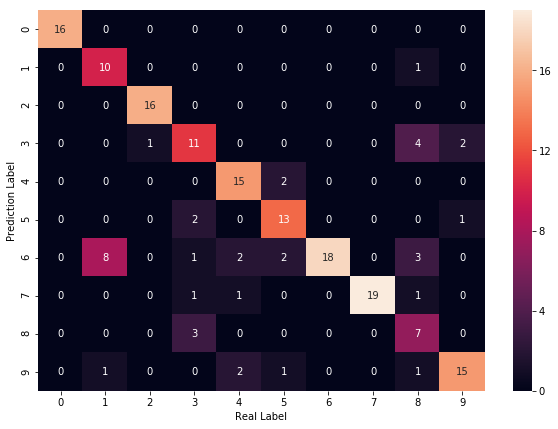

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:27 index:[6] real:5
#1 min_error:30 index:[2 3] real:2
#2 min_error:32 index:[8] real:8
#3 min_error:6 index:[0] real:0
#4 min_error:21 index:[1] real:1
#5 min_error:24 index:[7] real:7
#6 min_error:5 index:[6] real:6
#7 min_error:18 index:[3] real:3
#8 min_error:12 index:[2] real:2
#9 min_error:30 index:[1] real:1
#10 min_error:26 index:[7] real:7
#11 min_error:32 index:[9] real:4
#12 min_error:8 index:[6] real:6
#13 min_error:18 index:[3] real:3
#14 min_error:26 index:[1] real:1
#15 min_error:27 index:[3] real:3
#16 min_error:31 index:[9] real:9
#17 min_error:20 index:[1] real:1
#18 min_error:36 index:[7 8] real:7
#19 min_error:2 index:[6] real:6
#20 min_error:31 index:[8] real:8
#21 min_error:18 index:[4] real:4
#22 min_error:18 index:[3] real:3
#23 min_error:29 index:[1] real:1
#24 min_error:19 index:[4] real:4
#25 min_error:14 index:[0] real:0
#26 min_error:27 index:[5] real:5
#27 min_error:15 index:[3] real:3
#28 min_error:14 index:[6] real:6
#29 min_error:25 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8639455782312925
Avg Base Learner:0.7955967841682127


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.05555555555555555
Accuracy on training set: 0.21666666666666667
Accuracy on training set: 0.11666666666666667
Accuracy on training set: 0.2777777777777778
Accuracy on training set: 0.3111111111111111
Accuracy on training set: 0.34444444444444444
Accuracy on training set: 0.35
Accuracy on training set: 0.3388888888888889
Accuracy on training set: 0.34444444444444444
Accuracy on training set: 0.4388888888888889
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.4666666666666667
Accuracy on training set: 0.5277777777777778
Accuracy on training set: 0.5611111111111111
Accuracy on training set: 0.5666666666666667
Accuracy on training set: 0.5888888888888889
Accuracy on training set: 0.5944444444444444
Accuracy on training set: 0.6722222222222223
Accuracy on training set: 0.6555555555555556
Accuracy on training set: 0.6666666666666666
Accuracy on training set: 0.6777777777777778
Accuracy on training set: 0.6944444444444444
Accuracy on traini

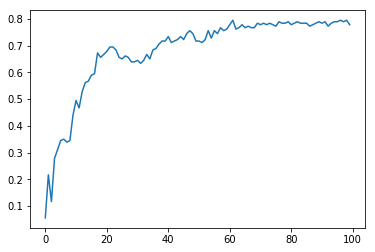

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.05555555555555555,
 0.21666666666666667,
 0.11666666666666667,
 0.2777777777777778,
 0.3111111111111111,
 0.34444444444444444,
 0.35,
 0.3388888888888889,
 0.34444444444444444,
 0.4388888888888889,
 0.49444444444444446,
 0.4666666666666667,
 0.5277777777777778,
 0.5611111111111111,
 0.5666666666666667,
 0.5888888888888889,
 0.5944444444444444,
 0.6722222222222223,
 0.6555555555555556,
 0.6666666666666666,
 0.6777777777777778,
 0.6944444444444444,
 0.6944444444444444,
 0.6833333333333333,
 0.6555555555555556,
 0.65,
 0.6611111111111111,
 0.6555555555555556,
 0.6388888888888888,
 0.6388888888888888,
 0.6444444444444445,
 0.6333333333333333,
 0.6444444444444445,
 0.6666666666666666,
 0.65,
 0.6833333333333333,
 0.6888888888888889,
 0.7055555555555556,
 0.7166666666666667,
 0.7166666666666667,
 0.7333333333333333,
 0.7111111111111111,
 0.7166666666666667,
 0.7222222222222222,
 0.7333333333333333,
 0.7222222222222222,
 0.7444444444444445,
 0.7555555555555555,
 0.7444444444444445,
 0.7166